# K-Mean function and some applications 
## By Leo Correia 
## July 13 th 2021

### 1 - Introduction 
Its a very primitive function to find K-clusters in a set of points in a 2D environment \
The first par of the code is the function itself, and I will apply it with 2 sets of data \

* Simulated with *sklearn.datasets make_blobs*
* Brazilian inflation (CPI and PPI)
 



In [110]:
### this chunk of code defines the function that will be used for the applications 

### The Kmeans function is defined to calculate the distance considering the euclidian one

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn
import pandas as pd


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin ### without this pacakge, my function would be very bad :(
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



#The function ClusterFinder has 2 parts, one (PART 1 ) in which I define centers at a randomly fashion 
# The part 2 has 3 parts 
# Part 2A computes the first distance from the points and the randomly attributed centers 
# Part 2B  computes the first update. Considering the distance between the points and a mean




def ClusterFinder(Y, ClustersNumber, RandomSeed):

    # Part 1 - Definining First clusters as random positions 
    RandomStart = np.random.RandomState(RandomSeed)
    i = RandomStart.permutation(Y.shape[0])[:ClustersNumber]
    centers = Y[i]

    while True:

        # Part 2A. Expectation Phase in the algorithm . It Gathers 
        # the distance based on the clostest defined center. From the Phase 1, the 
        # first input is a random defined center. 

        distance = pairwise_distances_argmin(Y, centers)
        
        # Part 2B. It is the Maximization phase, which the argument is the mean.
        # From the distance defined at Part 2A, We can 
        # update the distance, from the points means 

        NewDistance = np.array([Y[distance == i].mean(0)
                                for i in range(ClustersNumber)])
        
        # PART 2C. Checking for convergence in the EM algorithm
        if np.all(centers == NewDistance):
            break
        centers = NewDistance
    
    return centers, distance

    ##centers are the coordinates for each center point
    ## distance is the cluster ID for each point 


### First Application simulated data 


###### Second Application Brazilian inflation data CPI and PPI

#### Second application Brazilian inflation data 


### 2 - First Application Simulated Data

With the *make_blobs* function I simulated a 300 points with 4 centers. the results are showed bellow


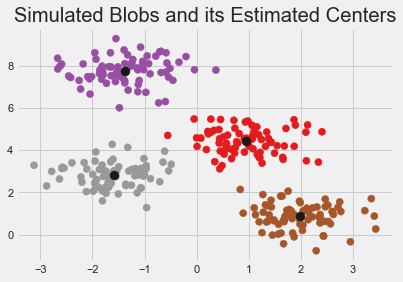

In [111]:
## First Application simulated data 

### simulate the data 
Y, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

## applying the fucntion and graph 


YCenters, distances = ClusterFinder(Y, 4,2)
plt.style.use("fivethirtyeight")
plt.scatter(Y[:, 0], Y[:, 1], c=distances,
            s=50, cmap='Set1')
plt.scatter(YCenters[:,0] , YCenters[:,1] , s = 80, color = 'k') ##centers are plotted in black 
plt.title("Simulated Blobs and its Estimated Centers")
plt.show() 


### 3 - Second Application - Brazilian CPI and PPI Data 

Brazilian inflation is a very interesting phenomenon to be studied regardless of the method. \
Time series econometrics, hidden markovs and even  machine learning algorithms \
I would like to apply my function to see what the K-means can reveal to us about Brazilian Inflation 
* The CPI data is from the Brazilian Statistical and Geograph Instititue. This CPI is the iflation rate that serves as target for the Brazilian Central Bank 
* The PPI data is from FGV. Although the data is released for the public, FGV is an private institution. \
The data is 12-months accumulated monthly inflation and it is in the decimal format 


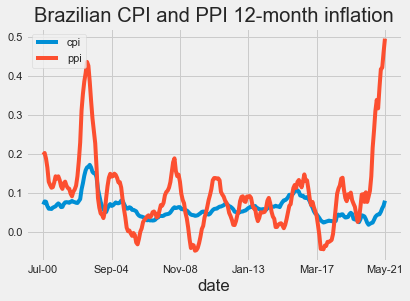

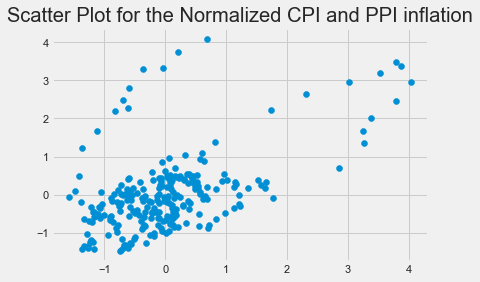

In [96]:
###### Second Application Brazilian inflation data CPI and PPI

#### Second application Brazilian inflation data 
url = 'https://raw.githubusercontent.com/lehito21/brazilian_inflation_data/main/brazilian%20inflation.csv'

df = pd.read_csv(url, index_col=0)

df[['cpi','ppi']].plot()
plt.title("Brazilian CPI and PPI 12-month inflation")
plt.show()

plt.scatter( x=df["norm_cpi"], y=df["norm_ppi"])
plt.title("Scatter Plot for the Normalized CPI and PPI inflation")
plt.show()

The scatterplot tells us a sad news. The cluster numbers are not easily detected only by eyeballing. \
We should apply the elbow point technique to help identify the quantity of cluster that should be estimated 


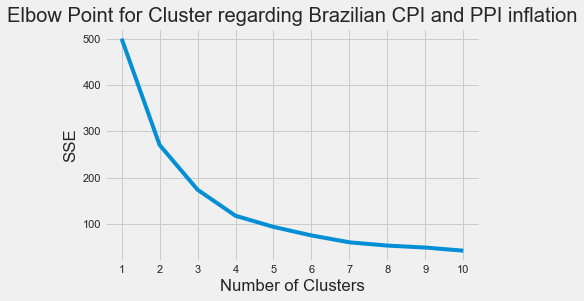

In [99]:
### in order to conducty quickly the elbow point techinique, I used some already build in framework


## transforming the data in arrays. It will be necessary to pass our ClusterFind function anyway. 

InflaData = (df.iloc[:,2:4].reset_index(drop=True)).to_numpy()



kmeans = KMeans(init="random",
         n_clusters=3,
         n_init=10,
         max_iter=300,
         random_state=42)


kmeans.fit(InflaData)

kmeans_kwargs = {
                 "init": "random",
                 "n_init": 10,
                 "max_iter": 300,
                 "random_state": 42,}


# A list holds the SSE values for each k This will help to identify the elbow point 
sse = []
for k in range(1, 11):
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(InflaData)
            sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Point for Cluster regarding Brazilian CPI and PPI inflation")
plt.show()



#InflaCenters, InflaDistances = ClusterFinder(InflaData, 3,2)

#print(InflaCenters)
#print(InflaDistances)
#plt.scatter(InflaCenters[:, 0], InflaCenters[:, 1], c=InflaDistances,s=50, cmap='Set1')
#plt.scatter(InflaCenters[:,0] , InflaCenters[:,1] , s = 80, color = 'k') ##centers are plotted in black 
#plt.title("Brazilian CPI and PPI inflation clusters and its Estimated Centers")
#plt.show() 


The graph suggests 4 or 5 clusters. I will stick with at this moment. 

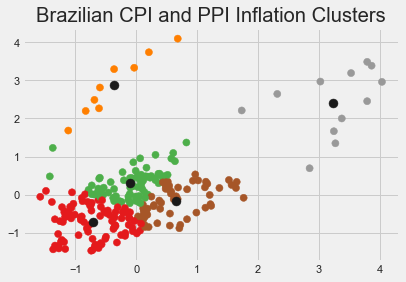

In [108]:
#### Fitting our ClusterFind function 



InflaCenters, InflaDistances = ClusterFinder(InflaData, 5,2)

plt.style.use("fivethirtyeight")
plt.scatter(InflaData[:, 0], InflaData[:, 1], c=InflaDistances,s=50, cmap='Set1')
plt.title("Brazilian CPI and PPI Inflation Clusters")
plt.scatter(InflaCenters[:,0] , InflaCenters[:,1] , s = 80, color = 'k') ##centers are plotted in black 
plt.show() 



Looking at the graphic above it is possible take some conclusions regarding the clusters:
#### <p style="color:red"><B>The Red cluster</B></p> - Indicates a scenario in which Brazilian inflation is down even on deflation mode
#### <p style="color:orange"><b>The Orange cluster</b></p>- This indicates a scenario where the supply shock is already converting into higher prices on PPI, but the CPI is still not reacting.<br> In this scenario, inflation on CPI shall rise soon and swiftly. 

#### <p style ="color:#008000"><b>The Green Cluster </b> </p> and <p style ="color:#966F33"><b>Brown Cluster </b></p> - Although slightly different, even with respective qualities and characteristics, on general those two clusters represents a scenario where the inflation is well behaved.

#### <p style ="color:#848482"><b>The Gray Cluster</b></p> - Runaway inflation. As soon as the inflation scenario in Brazil gets here, Brazilian CPI will be higher for the foreseeable future along with higher interest rates 
